# Data Scientist Associate Practical Exam Submission



# **Data Validation**

The original data had 1500 rows and 8 columns. After validation the number of rows and columns has remained the same. The following describes the validation process of each column:
- Booking id: There were 1500 unique values ranging from 1 to 1500 which matches what was expected. There were no missing values.
- Months as member: There were 72 unique values ranging from 1 to 148 so within the expected range. There were no missing values.
- Weight: The values range from 55.41 to 170.52 which matches the required minimum of 40kg. There were 20 missing values which have been replaced with the average weight (81.61).
- Days before: There were 25 instances were the value was followed by 'days', all instances where this occurred were replaced leaving only the numerical value. The data type has been changed from object to int64. There were no missing values.
- Day of week: There were 10 rows where 'Monday' has been replaced by 'Mon', 35 rows where 'Wednesday' has been changed to 'Wed' and 26 rows where 'Fri.' has been replaced by 'Fri', after validation all values follow the required format. There were no missing values.
- Time: There were two unique values 'AM' and 'PM' which matches what was expected. There were no missing values.
- Category: There were 13 instances of '-' that were changed to 'unknown', after the change the values match what was expected. After the changes there are no missing values.
- Attended: There were two unique values 0 and 1 as expected. There were no missing values.

### Original dataset

In [48]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

df = pd.read_csv('fitness_class_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


After replacing all missing values in weight column with the mean.

In [49]:
mean = round(df.weight.mean(),2)
df.weight = df.weight.fillna(mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


After validating the days before column to the required format.

In [50]:
df.days_before = df.days_before.replace(to_replace = {'10 days':'10','14 days':'14','12 days':'12','6 days':'6','4 days':'4','2 days':'2','5 days':'5','7 days':'7','8 days':'8','1 days':'1','3 days':'3','13 days':'13'})
df.days_before = df.days_before.astype('int64')
print(f'The unique values contained in the days before column are {df.days_before.unique()}')
df.info()

The unique values contained in the days before column are [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


After correctly formatting the day of the week column.

In [51]:
df.day_of_week = df.day_of_week.replace(to_replace = {'Wednesday':'Wed','Monday':'Mon','Fri.':'Fri'})
print('The unique values now found in the day of week column are:')
print(*df.day_of_week.unique())


The unique values now found in the day of week column are:
Wed Mon Sun Fri Thu Tue Sat


After replacing missing data with "unknown" in the category column.

In [52]:
df.category = df.category.replace(to_replace = '-',value = 'unknown')
df.category.value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

# Exploratory Data analysis
From Graph 1 we can see that the proportion of the "did attend" class is 30%, this means that the 2 possible outcomes aren't balanced, however the issue is not too severe and therefore I decided not to adress it at this point. 

From Graph 2 it becomes more apparent than most members have a relationship with the company that ranges between 4 and 20 months and there are only 8 observations above 80 months. These outliers will be removed from the data as they are not representative of the population of members and may influence the model's predictions.

Graph 3 allows us to understand the relationship between the length of membership and the likelihood of attending classes, the category attended doubles the mean and median number of months as member of the did not attend class, this shows that length of membership could be a good predictor for class attendance. It's also important to note that the minimum number of months as member for the observations that did attend the class is 4 months as opposite to the did not attend where it is 1 month. 

Finally to enable model fitting I have made the following changes to the data:
- Remove the booking id column since it has all unique values, so it won't be used as a feature.
- Convert all categorical variables into numeric variables.
- Lastly remove the 8 outliers as mentioned above and the 13 observations where the class category is unknown.
- This leaves a total of 1479 observations.



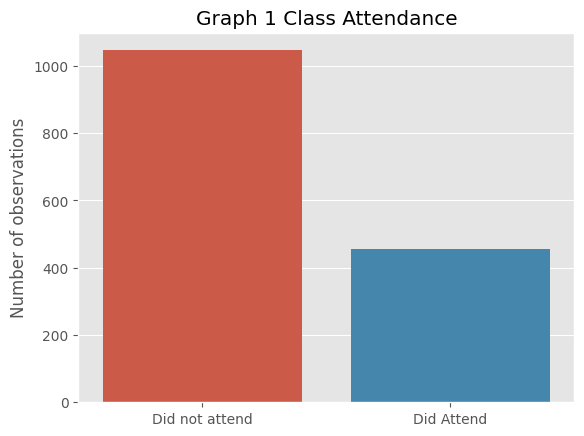

In [53]:
plt.style.use('ggplot')
sns.countplot(x='attended',data=df)
plt.xticks([0,1],['Did not attend','Did Attend'])
plt.xlabel(None)
plt.ylabel('Number of observations')
plt.title('Graph 1 Class Attendance')
plt.show()

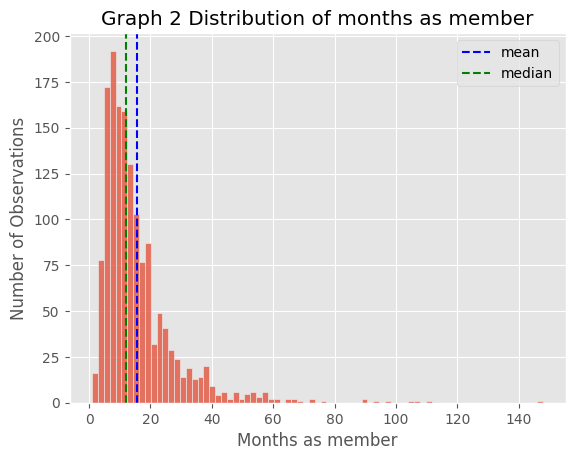

In [54]:
fig, ax = plt.subplots()
sns.histplot(data=df,x='months_as_member',ax=ax)
ax.axvline(x=df.months_as_member.mean(),color='blue',linestyle = '--',label = 'mean')
ax.axvline(x=df.months_as_member.median(),color = 'green',linestyle = '--',label = 'median')
ax.legend()
plt.ylabel('Number of Observations')
plt.xlabel('Months as member')
plt.title('Graph 2 Distribution of months as member')
plt.show()

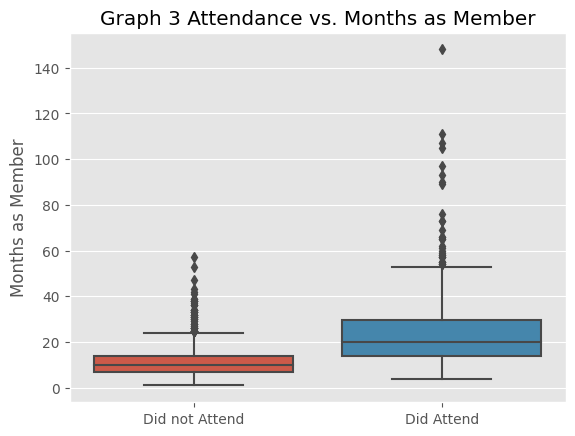

In [55]:
sns.boxplot(x='attended',y='months_as_member',data=df)
plt.xlabel(None)
plt.xticks([0,1],['Did not Attend','Did Attend'])
plt.ylabel('Months as Member')
plt.title('Graph 3 Attendance vs. Months as Member')
plt.show()

Make changes to the data to enable modelling

In [56]:
df = df[df['category']!='unknown']
df = df[df['months_as_member']<=80]


dummies = pd.get_dummies(df[['time','day_of_week','category']])

features = pd.concat([df[['months_as_member','weight','days_before']],dummies],axis=1)
X = features.values
Y = df.attended.values

## Business Problem
The business problem we are dealing with is a great number of clients booking for a class and then not attending the class, we therefore want to be able to predict when this will happen. This is a binary classification problem.

What this means is that the question has only two possible asnwers, the client either will attend or will not attend. 

This type of classification problem can be approached with several types of models however I will use a logistic regression model as a baseline model and a decision tree classifier as a comparison model.

In [57]:
# import Ml models and metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [58]:
# Split dataset into 70% training set and 30% test set
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42,stratify = Y)
# Initialize a KFold instance to be used in model evaluation
kf = KFold(n_splits=6,shuffle=True,random_state = 42)

### Method 1: Logistic Regression Model

In [59]:
# logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
y_pred_proba_log = logreg.predict_proba(X_test)[:,1]

### Method 2: Decision Tree Model

In [60]:
clf = DecisionTreeClassifier(max_depth = 3, random_state= 42)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
y_pred_proba_clf = clf.predict_proba(X_test)[:,1]

## Model Selection
I chose logistic regression as the baseline for it's simplicity and efficiency in both training and interpretability, and a decision tree classifier as a comparison model since it may find non-linear relationships that would scape the logistic regression model.

## Model Evaluation
Due to the nature of the business problem I wanted to be careful when choosing the metric to use to compare the models.
While accuracy may be more easily interpreted (number of correct predictions of all predictions) it can lead to overestimating the performance of a model, specially when the two possible outcomes like in this case are imbalanced.
In simple terms since 70% of all bookings don't attend the class a model that predicts that no one will attend classes would be accurate 70% of the time.
This is the reason why I have decided to base my decision on the f1 score.
The f1 score combines precision and recall giving equal weights to both metrics, meaning both metrics have to be high enough in order for the f1 score to be high.
To better understand f1 scores I will briefly explain what precision and recall are:
- Precision measures the number of true positives over true positives and false positives. This shows a ratio of true positives for all positive predicted by the model.
- Recall measures the number of true positives over true positives and false negatives. The higher the recall the less true positives that our model has incorrectly labelled as negatives.

Comparing models using f1 scores will help to make sure that the performance of the models is being assesed properly and the business will be able to make decissions on whether to overbook classes more confidently.

The logistic regression model has a test f1 score of 0.86 for the did not attend class and 0.55 for the attended class.
The decision tree model has a test f1 score of 0.83 for the did not attend class and 0.64 for the attended class.
Looking at these results we can conclude that overall the decision tree model has performed better on average between the two classes and perhaps more importantly to our case a higher f1 score on the attended class means the decision tree is more likely to correctly predict when someone will attend the class and therefore it might be more cautious to follow it's predictions when overbooking classes.






### Training Results:

Logistic Regression

In [61]:
# training data logistic
accuracy = cross_val_score(logreg,X_train,y_train,cv=kf,scoring = 'precision')
f1 = cross_val_score(logreg, X_train,y_train,cv=kf,scoring='f1')
recall = cross_val_score(logreg,X_train,y_train,cv=kf,scoring='recall')

print(f'The mean accuracy of the logictic regression model on the training data is : {accuracy.mean()}')
print(f'The mean f1 score is: {f1.mean()}')
print(f'And the mean recall is: {recall.mean()}')


The mean accuracy of the logictic regression model on the training data is : 0.681430538043395
The mean f1 score is: 0.507594879121036
And the mean recall is: 0.4056423407198601


Decision tree

In [62]:
# training data tree

tree_accuracy = cross_val_score(clf,X_train,y_train,cv = kf)
tree_recall = cross_val_score(clf,X_train,y_train,cv = kf,scoring = 'recall')
tree_f1 = cross_val_score(clf,X_train,y_train,cv = kf,scoring = 'f1')

print(f'The mean accuracy of the decission tree model on the training data is: {tree_accuracy.mean()}\nThe mean recall is: {tree_recall.mean()}\nAnd the mean f1 is: {tree_f1.mean()}')

The mean accuracy of the decission tree model on the training data is: 0.7497199444369763
The mean recall is: 0.4244818990943022
And the mean f1 is: 0.4933933380736309


### Test Results:

Logistic Regression

In [63]:
# test data logistic

print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       311
           1       0.73      0.44      0.55       133

    accuracy                           0.78       444
   macro avg       0.76      0.69      0.70       444
weighted avg       0.78      0.78      0.77       444



Decision Tree

In [64]:
# test data tree
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       311
           1       0.60      0.68      0.64       133

    accuracy                           0.77       444
   macro avg       0.73      0.74      0.73       444
weighted avg       0.78      0.77      0.77       444



## Model Performance Graphs
I have included these graphs to help visualize the model evaluation.

Graph 4 plots the correct positive predictions and the false positive predictions for varying threshold levels, an ideal model would have an roc curve that "hugs" the top left of the graph.
We can see how the logistic regression model seems to perform slightly better when taking only these metrics into account.

Graph 5 plots recall and precission for varying threshold levels, an ideal model in this case would "hug" the top right corner of the graph, here we can see how the decision tree outperforms the logistic regression model.

Lastly I have included a decision map to show how the model classifies the data and allow for further interpretability. 

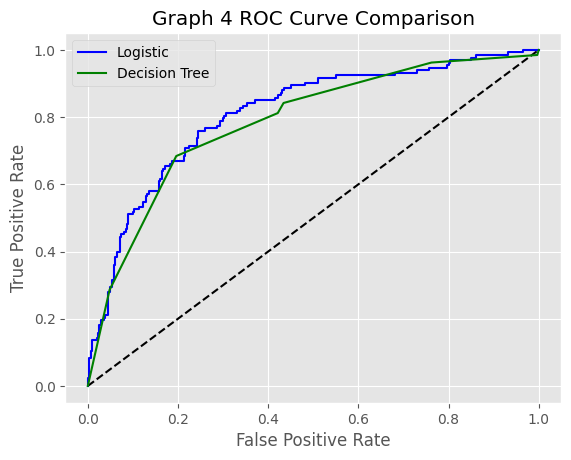

In [65]:
# plotting the roc curve, finally it is over with the roc

fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_log)
fprt, tprt, thresholds = roc_curve(y_test,y_pred_proba_clf)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,color='b',label='Logistic')
plt.plot(fprt,tprt,color='g',label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Graph 4 ROC Curve Comparison')
plt.legend()
plt.show()

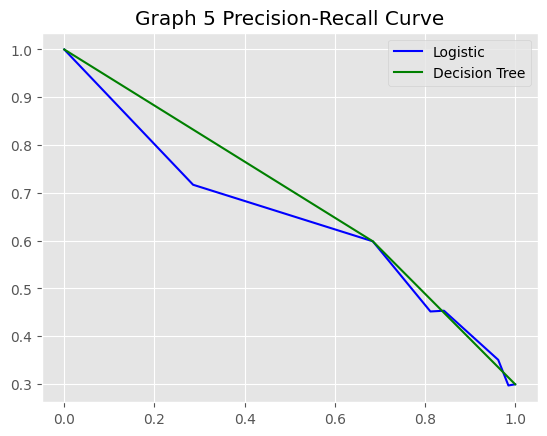

In [66]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba_clf)
precisiont, recallt, thresholdst = precision_recall_curve(y_test,y_pred_clf)

plt.plot(recall,precision,color='b',label='Logistic')
plt.plot(recallt,precisiont,color='g',label='Decision Tree')
plt.title('Graph 5 Precision-Recall Curve')
plt.legend()
plt.show()

### Decision Tree Map

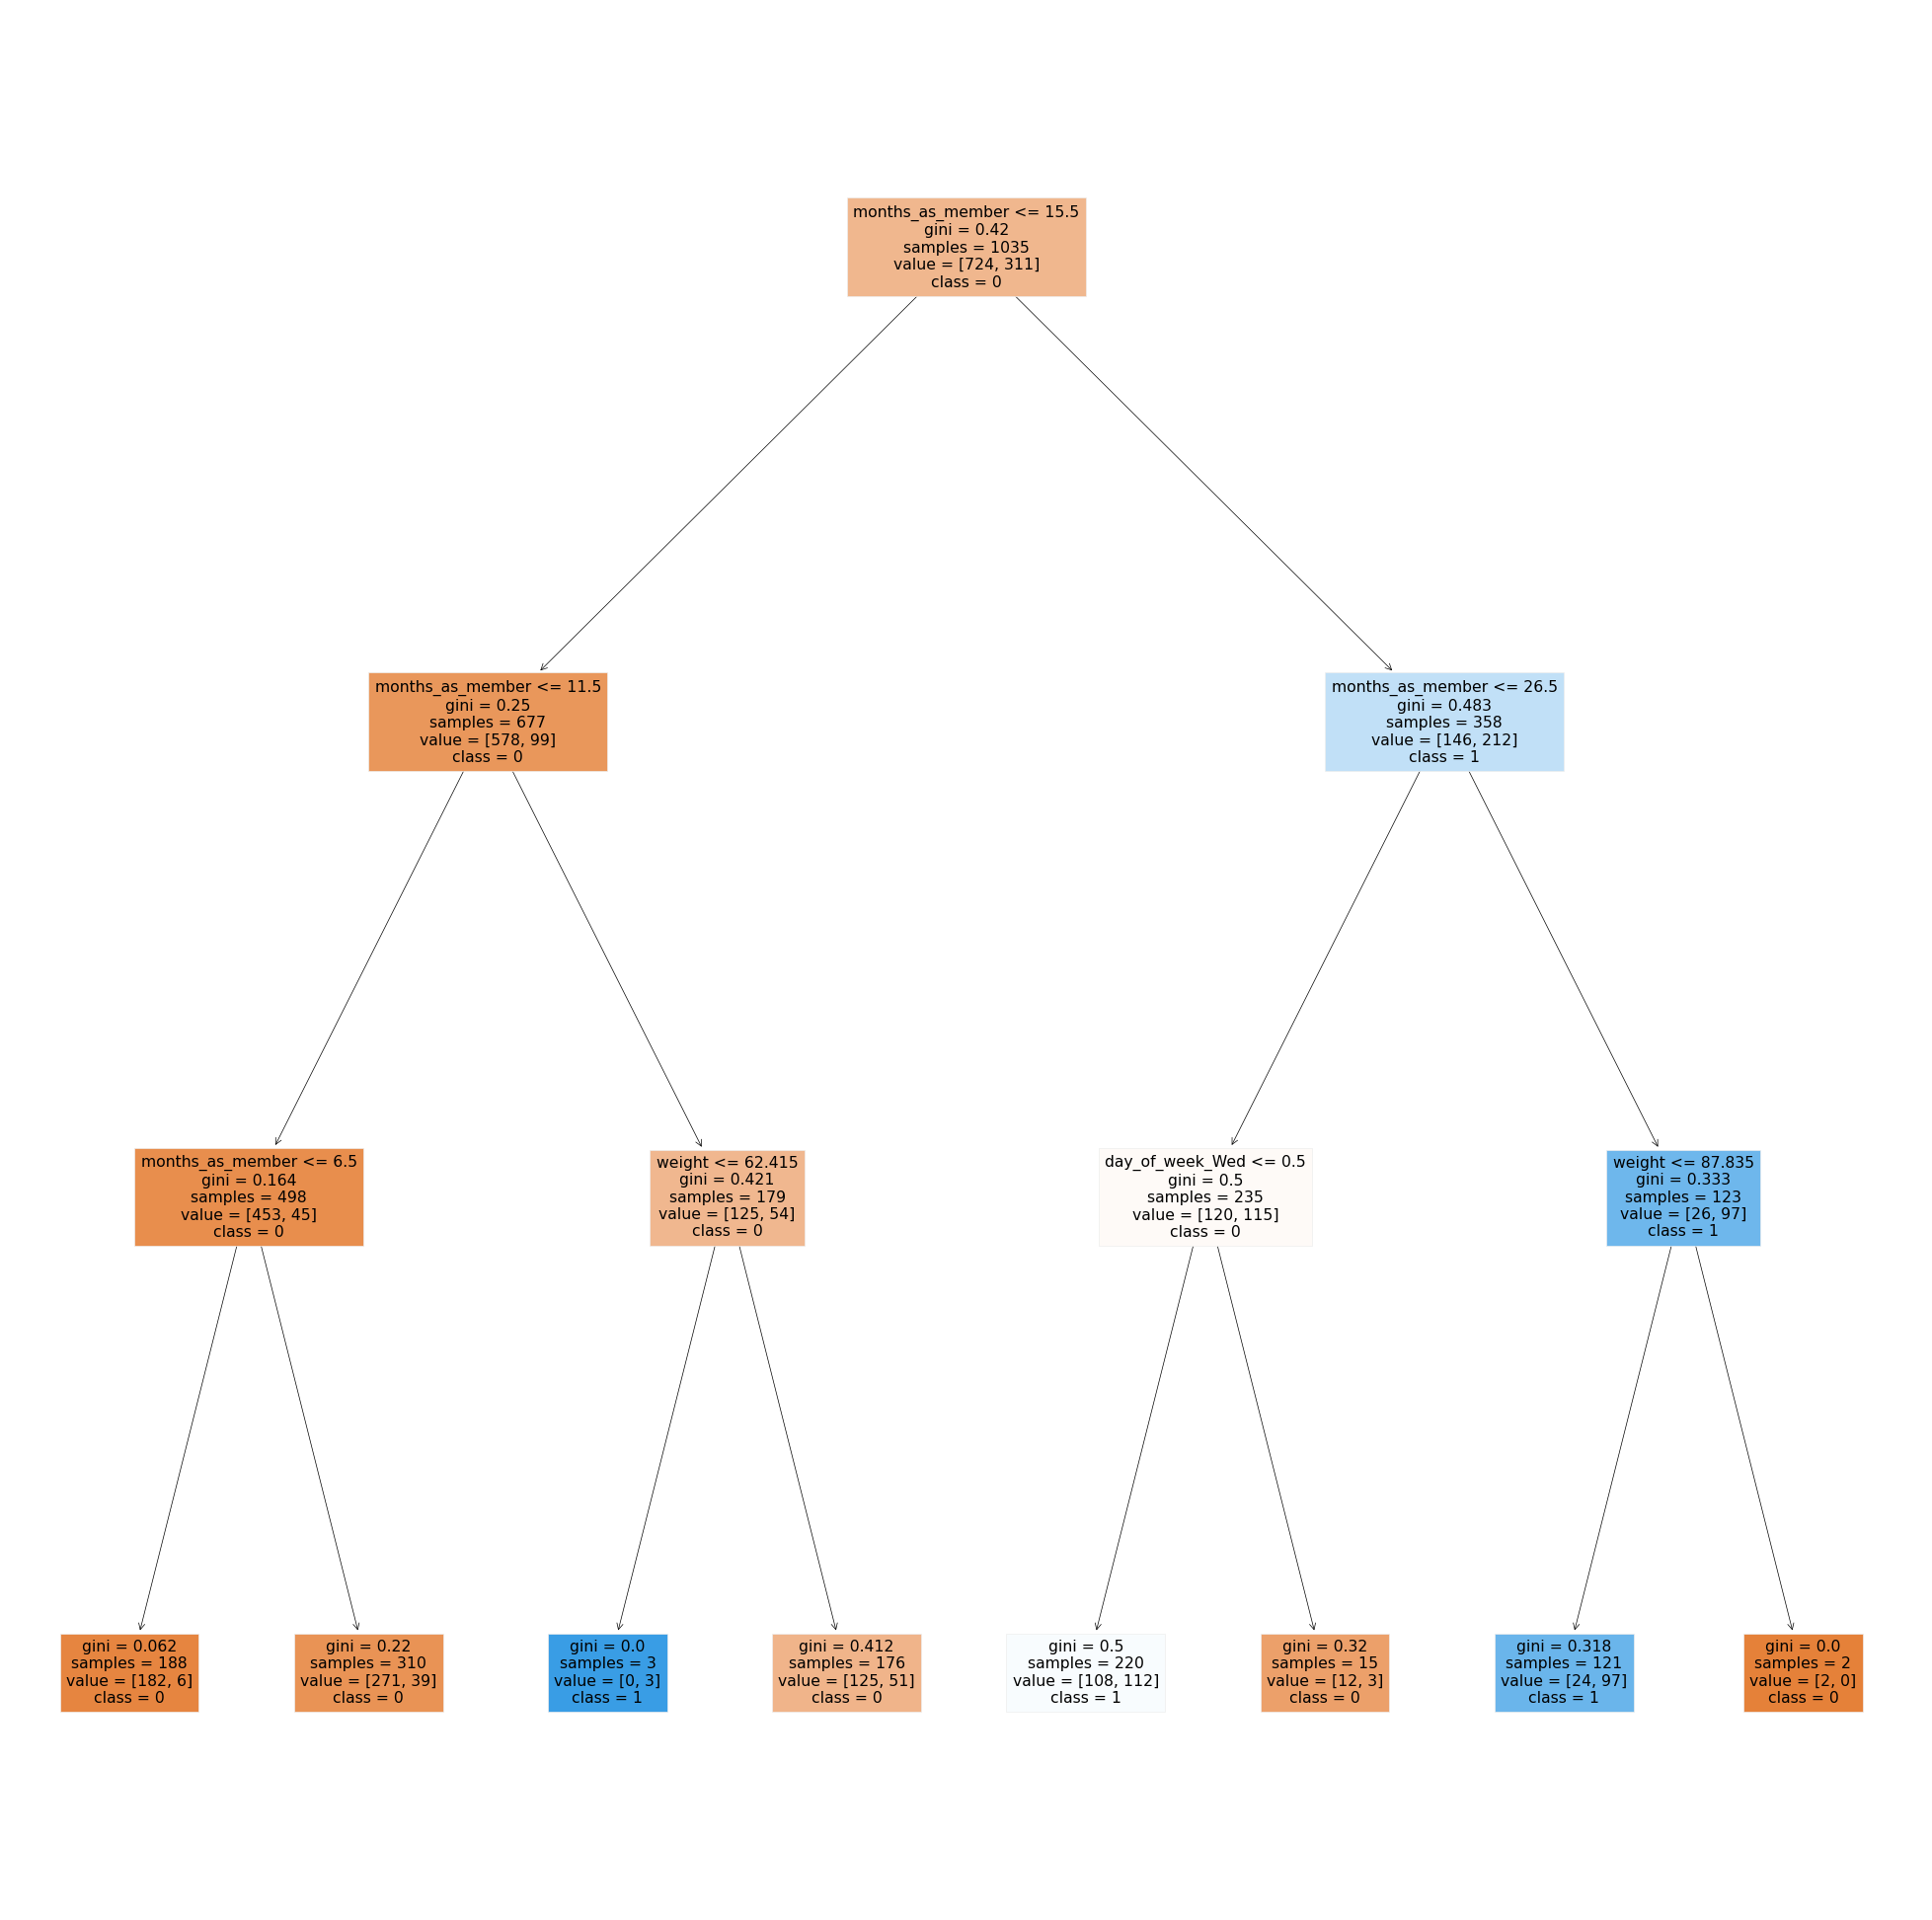

In [67]:
# plotting the tree
fix, ax = plt.subplots(figsize = (25,25))
plot_tree(clf,feature_names = features.columns, class_names = ['0','1'],filled = True)
plt.show()
